In [10]:
# Importing libraries
## for data
import numpy as np
import pandas as pd

## for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition



In [14]:
# Importing the dataset

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
# Clean up boolean data
clean_data = df.astype({'anaemia': 'bool', 'diabetes': 'bool', 'high_blood_pressure':'bool', 'smoking':'bool'})
clean_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,False,582,False,20,True,265000.00,1.9,130,1,False,4,1
1,55.0,False,7861,False,38,False,263358.03,1.1,136,1,False,6,1
2,65.0,False,146,False,20,False,162000.00,1.3,129,1,True,7,1
3,50.0,True,111,False,20,False,210000.00,1.9,137,1,False,7,1
4,65.0,True,160,True,20,False,327000.00,2.7,116,0,False,8,1


In [16]:
# Identify the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [17]:
df.isnull().sum()
# Checking if any row is missing any data.

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [18]:
print("Count of unique rows in each column.") 
df.nunique()

Count of unique rows in each column.


age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

# High Blood Pressure

In [19]:
ds = df['high_blood_pressure'].value_counts().reset_index()
ds.columns = ['high_blood_pressure', 'count']
fig = px.bar(ds, x='high_blood_pressure', y="count", orientation='v', title='Count of Patients with High-blood pressure', width=500)
fig.show()


Text(0, 0.5, 'Serum Sodium')

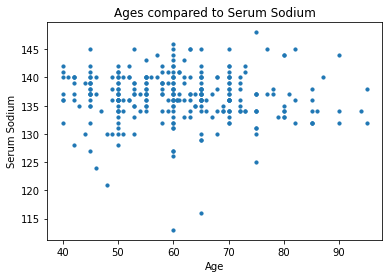

In [20]:
# Plot showing serum_sodium correlation with age.
plt.scatter(df.age, df.serum_sodium
, s=10 ) 
plt.title("Ages compared to Serum Sodium")
plt.xlabel("Age")
plt.ylabel("Serum Sodium")


In [21]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['age'],
    xbins=dict( 
        start=20,
        end=95,
        size=2
    ), 
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.10,
    xaxis =  {'showgrid': True },
    yaxis = {'showgrid': True },
    template = 'plotly'
)

fig.show()